<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Read Datasets

In [1]:
import pandas as pd # importing pandas module
df = pd.read_csv("train.csv") # reading csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df1 = pd.read_csv("test.csv") # reading csv file

In [3]:
df2 = pd.concat([df,df1],ignore_index = True,sort = 'True') # creating new data frame by concating two dataframes
df2

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes
977,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No
978,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No
979,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


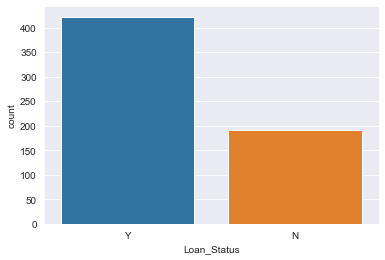

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Loan_Status',data=df2)
# many people got loans

### Handle Categorical Values

In [8]:
import category_encoders as cat_encoder # importing category_encoders to encode categorical variables into numeric
df3 = df2.copy() # copying dataframe into new dataframe
encoder = cat_encoder.BinaryEncoder(cols = ['Education','Gender','Married','Property_Area','Self_Employed','Dependents']) # mentioning required columns to be encoded
df4 = encoder.fit_transform(df3) # encoding the dataframe
display(df4)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Gender_0,...,Loan_Status,Married_0,Married_1,Married_2,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1,Self_Employed_2
0,5849,0.0,1.0,0,0,0,1,0,1,0,...,Y,0,0,1,0,0,1,0,0,1
1,4583,1508.0,1.0,0,0,1,0,0,1,0,...,N,0,1,0,0,1,0,0,0,1
2,3000,0.0,1.0,0,0,0,1,0,1,0,...,Y,0,1,0,0,0,1,0,1,0
3,2583,2358.0,1.0,0,0,0,1,1,0,0,...,Y,0,1,0,0,0,1,0,0,1
4,6000,0.0,1.0,0,0,0,1,0,1,0,...,Y,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,1.0,0,1,0,0,1,0,0,...,NaN,0,1,0,0,0,1,0,1,0
977,4158,709.0,1.0,0,0,0,1,0,1,0,...,NaN,0,1,0,0,0,1,0,0,1
978,3250,1993.0,NaN,0,0,0,1,0,1,0,...,NaN,0,0,1,0,1,1,0,0,1
979,5000,2393.0,1.0,0,0,0,1,0,1,0,...,NaN,0,1,0,0,1,0,0,0,1


In [9]:
loan_status = pd.get_dummies(df4['Loan_Status'],drop_first = True) # getting numerical values of categorical variables using get_dummies function
print(loan_status)

     Y
0    1
1    0
2    1
3    1
4    1
..  ..
976  0
977  0
978  0
979  0
980  0

[981 rows x 1 columns]


In [10]:
df4.drop(['Loan_Status','Loan_ID'],axis = 1,inplace = True) # Dropping the unwanted columns

In [11]:
df4['Loan_Status'] = loan_status # adding new column to a dataframe

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(-20, 200)

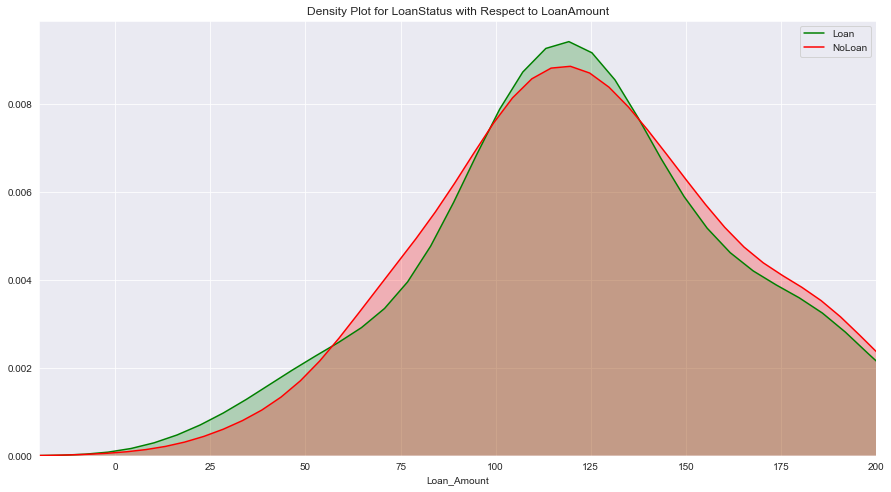

In [13]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(15,8))
axes=sns.kdeplot(df4["LoanAmount"][df4.Loan_Status == 1], color="green", shade=True)
sns.kdeplot(df4["LoanAmount"][df4.Loan_Status == 0], color="red", shade=True)
plt.legend(['Loan', 'NoLoan'])
plt.title('Density Plot for LoanStatus with Respect to LoanAmount')
axes.set_xlabel('Loan_Amount')
plt.xlim(-20,200)

People who appllied for loan Amount between 100 - 125 have high chance to get loan

In [14]:
df4.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Gender_0,...,Married_0,Married_1,Married_2,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1,Self_Employed_2,Loan_Status
0,5849,0.0,1.0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,1
1,4583,1508.0,1.0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3000,0.0,1.0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
3,2583,2358.0,1.0,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,1
4,6000,0.0,1.0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,1


### Check for Missing Data

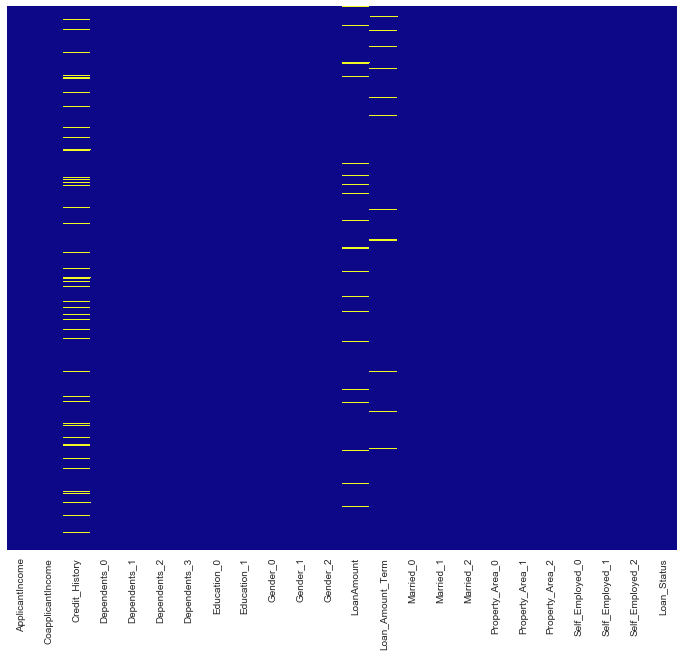

In [15]:
import seaborn as sns # importing seaborn module
from matplotlib import pyplot as plt # importing pyplot from matplotlib module
plt.figure(figsize=(12, 10)) # creating a blank figure
sns.heatmap(df4.isnull(),yticklabels=False,cbar=False,cmap='plasma') # heatmap to visualize null values

In [16]:
# filling columns containing null values with mean values of respective columns
mean_crehis = df4['Credit_History'].mean()
mean_LoanAmo = df4['LoanAmount'].mean()
mean_Loan_AmoTerm = df4['Loan_Amount_Term'].mean()

df4['Credit_History'].fillna(value = mean_crehis,inplace = True)
df4['LoanAmount'].fillna(value = mean_LoanAmo,inplace = True)
df4['Loan_Amount_Term'].fillna(value = mean_Loan_AmoTerm,inplace = True)

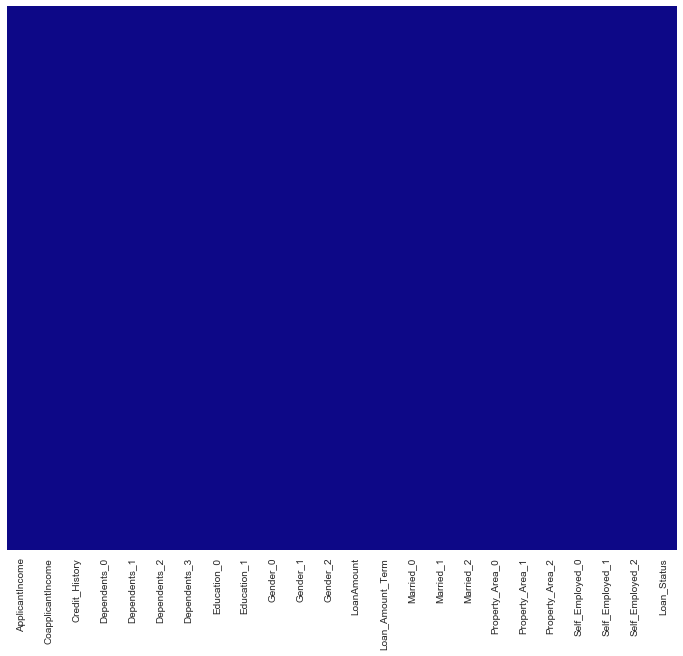

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df4.isnull(),yticklabels=False,cbar=False,cmap='plasma')

### Split Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df4.drop('Loan_Status',axis = 1),df4['Loan_Status'],test_size = 0.3,random_state = 101) # splitting the data into train and test data

### Apply different Classification Algorithms and tune them

In [19]:
from sklearn.linear_model import LogisticRegression # importing LogisticRegression function
lr = LogisticRegression()
lr.fit(x_train,y_train) # training the logistic regression model

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_predictions = lr.predict(x_test) # making predictions using test data

In [21]:
x = pd.DataFrame({"actual":y_test,"predicted":log_predictions}) # comparing actual and predicted data by creating a new dataframe
x

,actual,predicted
681,0,0
891,0,1
100,1,1
109,1,0
471,0,0
...,...,...
183,0,1
633,0,1
126,1,0
227,1,1


In [22]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree function
model = DecisionTreeClassifier(max_depth = 4,random_state = 0,criterion = 'gini') # using gini criteria to build decision tree
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
dec_predictions = model.predict(x_test)

In [24]:
x1 = pd.DataFrame({"Actual":y_test,"predicted":dec_predictions})
x1

,Actual,predicted
681,0,0
891,0,1
100,1,0
109,1,1
471,0,0
...,...,...
183,0,1
633,0,1
126,1,1
227,1,1


[Text(813.75, 1630.8, 'X[2] <= 0.418\ngini = 0.494\nsamples = 686\nvalue = [379, 307]'),
 Text(387.5, 1268.4, 'X[12] <= 547.5\ngini = 0.094\nsamples = 101\nvalue = [96, 5]'),
 Text(310.0, 906.0, 'X[1] <= 7697.0\ngini = 0.077\nsamples = 100\nvalue = [96, 4]'),
 Text(155.0, 543.6000000000001, 'X[0] <= 4836.0\ngini = 0.059\nsamples = 98\nvalue = [95, 3]'),
 Text(77.5, 181.20000000000005, 'gini = 0.027\nsamples = 72\nvalue = [71, 1]'),
 Text(232.5, 181.20000000000005, 'gini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(465.0, 543.6000000000001, 'X[10] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(387.5, 181.20000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(542.5, 181.20000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(465.0, 906.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1240.0, 1268.4, 'X[18] <= 0.5\ngini = 0.499\nsamples = 585\nvalue = [283, 302]'),
 Text(930.0, 906.0, 'X[0] <= 3417.5\ngini = 0.496\nsamples = 216\nvalue = [118, 98]'),


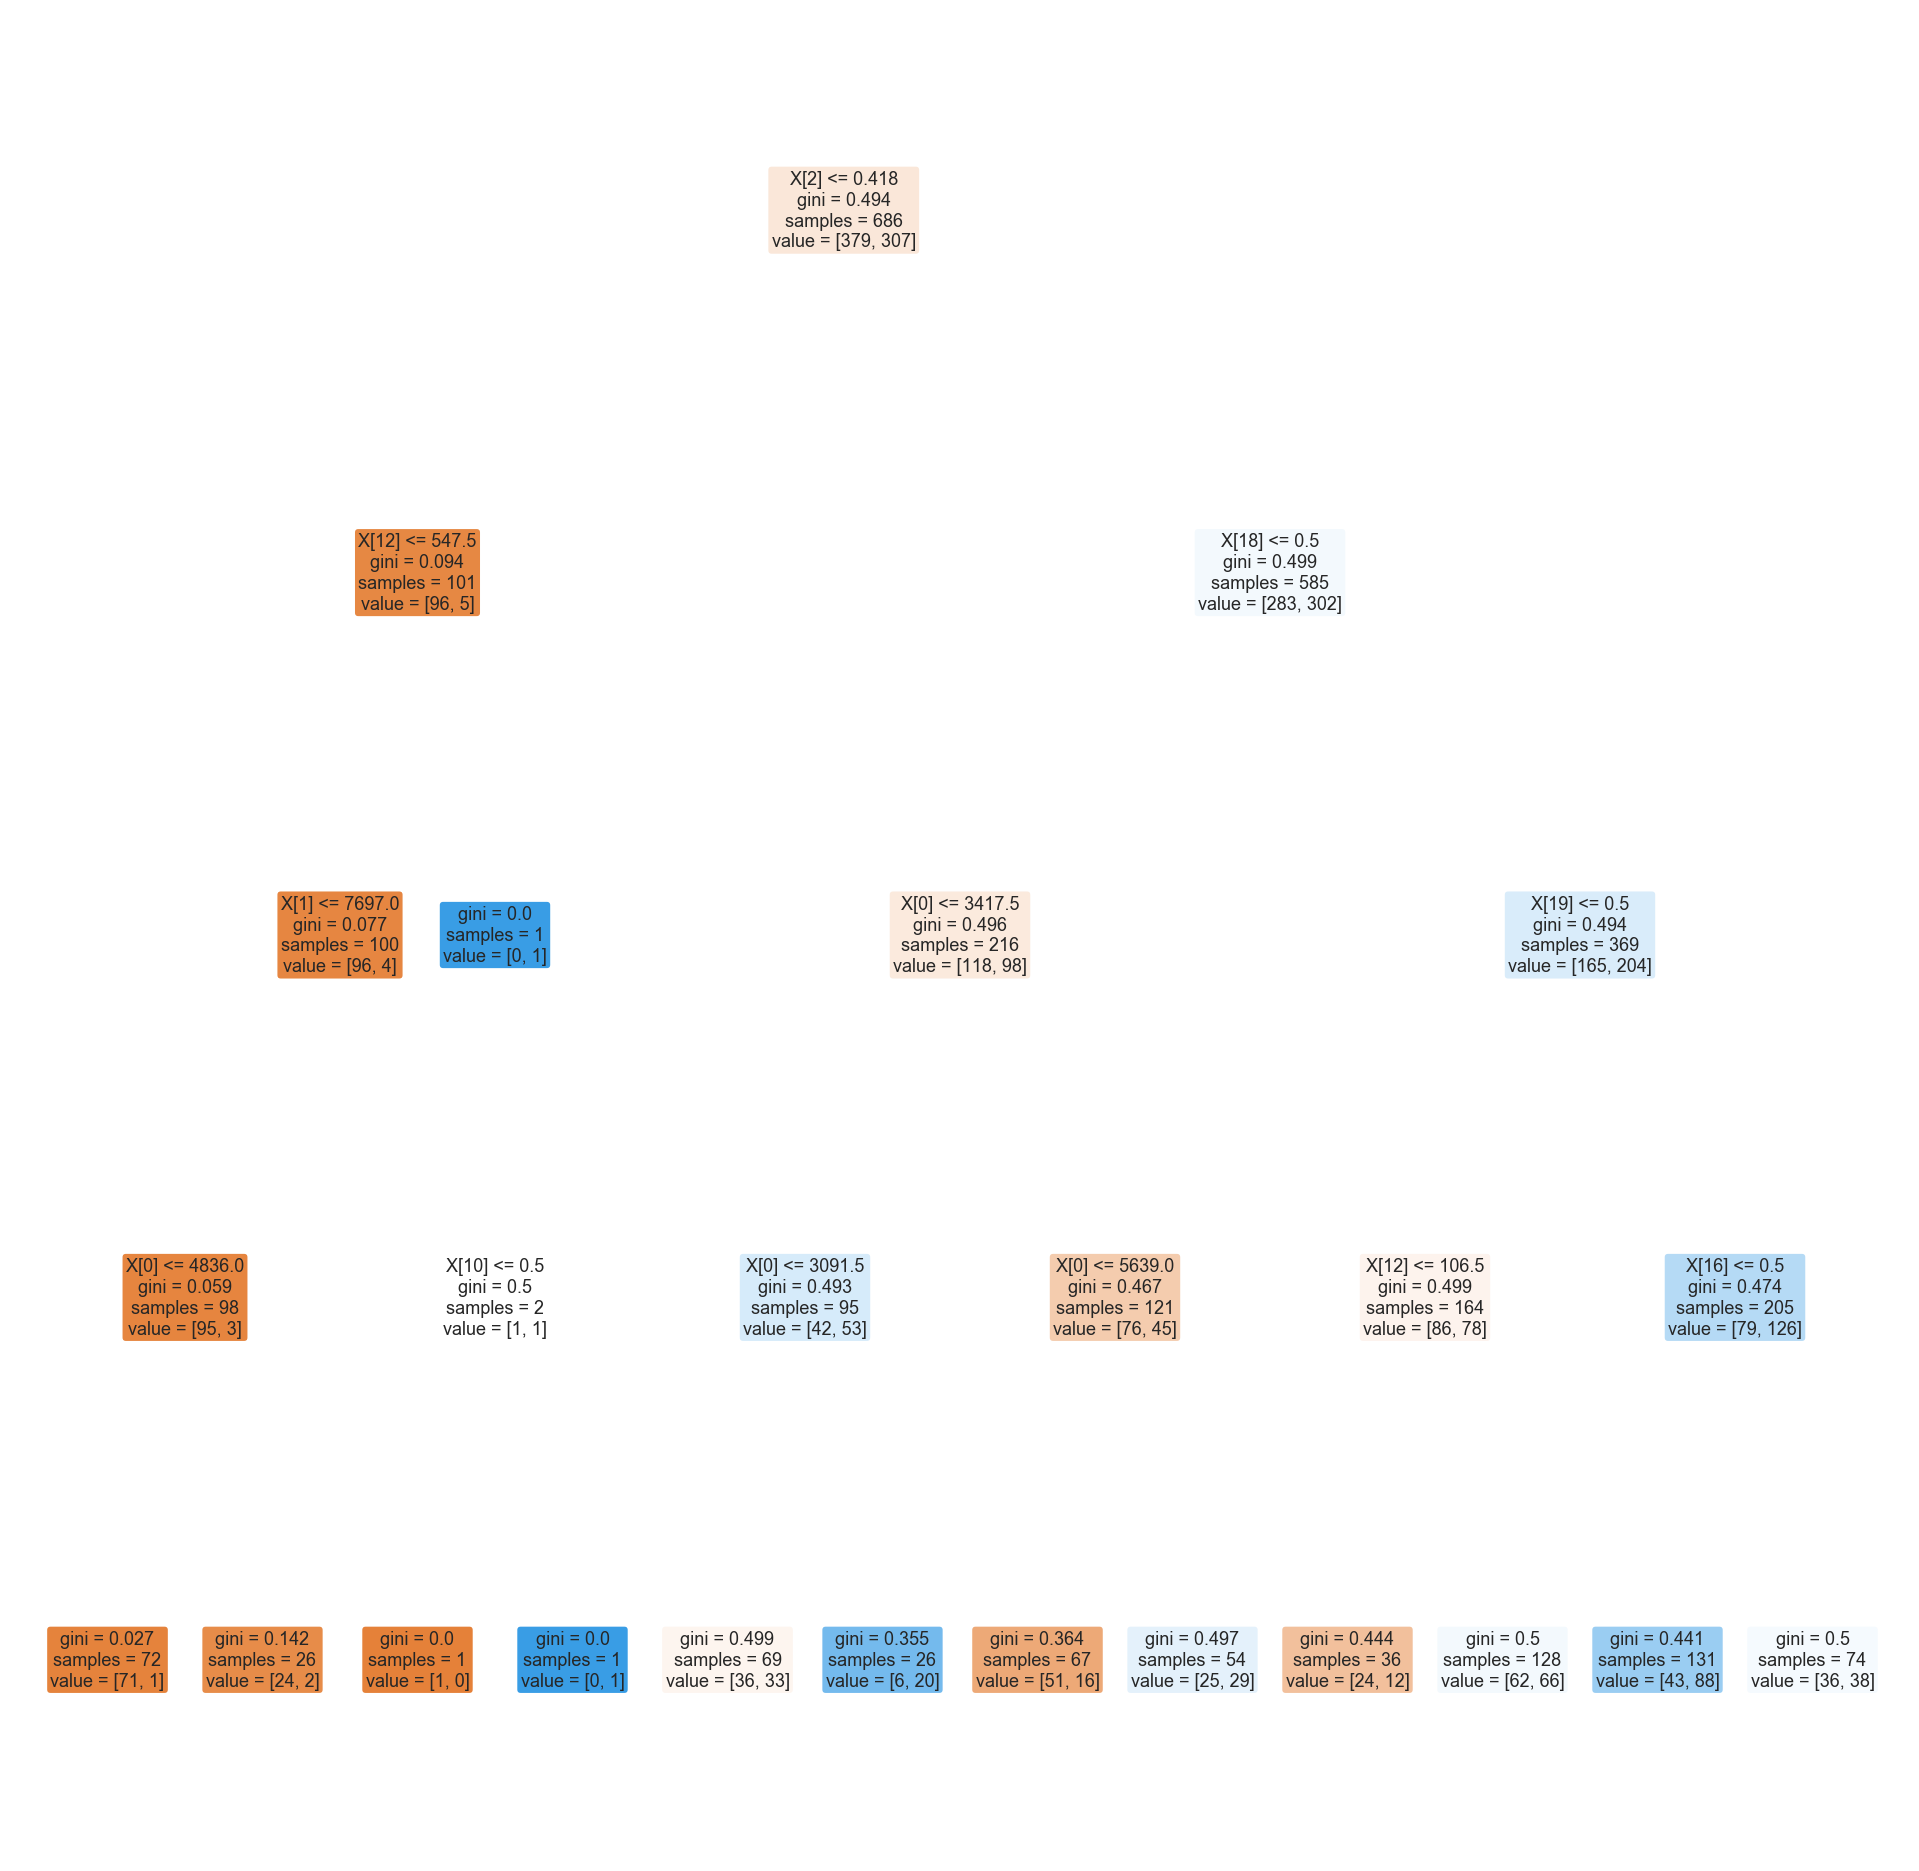

In [26]:
# visualizing the decision tree
from sklearn import tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(model,filled = True,rounded=True)

In [27]:
from sklearn.svm import SVC # importing support vector machine
svc_model = SVC()
svc_model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
svc_predictions = svc_model.predict(x_test)

In [29]:
x2 = pd.DataFrame({"Actual":y_test,"predicted":svc_predictions})
x2

,Actual,predicted
681,0,0
891,0,0
100,1,0
109,1,0
471,0,0
...,...,...
183,0,0
633,0,0
126,1,0
227,1,0


### Get performance metrics for all the applied classifiers

In [30]:
from sklearn.metrics import classification_report,confusion_matrix # importing required functions to calculate performance metrics
cnf_matrix_log = confusion_matrix(y_test,log_predictions)
cnf_matrix_log # printing confusion matrix

array([[98, 82],
       [46, 69]], dtype=int64)

In [31]:
class_report_logReg = classification_report(y_test,log_predictions) # getting classification report of logistic Regression
print(class_report_logReg)

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       180
           1       0.46      0.60      0.52       115

    accuracy                           0.57       295
   macro avg       0.57      0.57      0.56       295
weighted avg       0.59      0.57      0.57       295



In [32]:
cnf_mat_dectree = confusion_matrix(y_test,dec_predictions)
cnf_mat_dectree

array([[88, 92],
       [29, 86]], dtype=int64)

In [33]:
class_report_dectree = classification_report(y_test,dec_predictions)
print(class_report_dectree)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59       180
           1       0.48      0.75      0.59       115

    accuracy                           0.59       295
   macro avg       0.62      0.62      0.59       295
weighted avg       0.65      0.59      0.59       295



In [34]:
cnf_mat_svc = confusion_matrix(y_test,svc_predictions)
cnf_mat_svc

array([[179,   1],
       [115,   0]], dtype=int64)

In [35]:
class_report_svc = classification_report(y_test,svc_predictions)
print(class_report_svc)

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       180
           1       0.00      0.00      0.00       115

    accuracy                           0.61       295
   macro avg       0.30      0.50      0.38       295
weighted avg       0.37      0.61      0.46       295



### Visually compare the performance of all classifiers

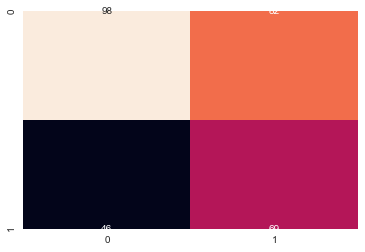

In [36]:
sns.heatmap(cnf_matrix_log, annot=True, fmt='g', cbar=False) # visualizing confusion matrix using sns heatmap

* In above confusion matrix,1 and 0 represent the loan status of a person where 1 means the person has loan and 0 means the person dont have loan
* The Logistic Regression classifier has made total 295 predictions, in those 167 are correct predictions and 128 are wrong predictions
* So almost 57% predictions are right and 43% predictions are wrong

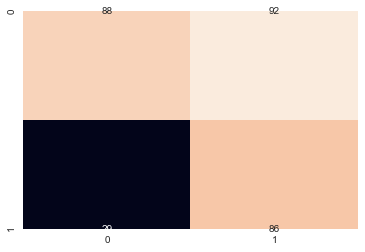

In [37]:
sns.heatmap(cnf_mat_dectree, annot=True, fmt='g', cbar=False)

* The decision tree classifier has made total of 295 predictions, in those 174 are correct predictions and 121 are incorrect predictions
* So almost 58% predictions are right and 42% predictions are wrong

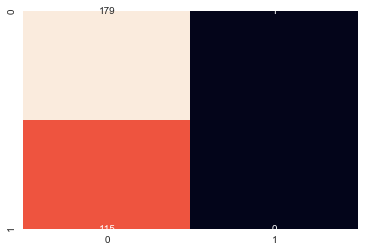

In [38]:
sns.heatmap(cnf_mat_svc, annot=True, fmt='g', cbar=False)

* The svm classifier has made total of 295 predictions, in those 179 are correct predictions and 116 predictions are wrong
* So svm predicted 60% correct predictions and 40% wrong predictions

We can conclude,
* In above three classifiers, svm classifier predicted more correct predictions, so svm is more suitable to this loan approval model compared to other two classifiers
* None of the above classifiers predict atleast 70% correct predictions
* we can improve the performance of these classifiers by changing the splitting percentage of train and test data.
* By using grid search we can increase the performance of svm